In [65]:
import pandas as pd

# Try different encodings if utf-8 fails
df = pd.read_csv("spam.csv", encoding="latin1")  # Try 'ISO-8859-1' or 'cp1252' if needed

# Display the first few rows
df.head()


,word,label
0,free,spam
1,win,spam
2,offer,spam
3,urgent,spam
4,winner,spam


In [66]:
print(df.columns)


Index(['word', 'label'], dtype='object')


In [64]:
df.rename(columns={"v1": "label", "v2": "word"}, inplace=True)


In [44]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['word', 'label'], dtype='object')


In [45]:
print(df["label"].unique())  # Check unique values


['spam' 'ham']


In [46]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Convert text into 5000 numerical features

# Transform SMS text into feature vectors
X = tfidf.fit_transform(df["word"]).toarray()  # Convert to array

# Target variable (Spam = 1, Ham = 0)
y = df["label"]

# Print shape of feature matrix
print("matrix shape:", X.shape)


matrix shape: (40, 40)


In [48]:
#train a naive bayes model


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.38

Classification Report:
               precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.00      0.00      0.00         5

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8



c:\Users\hp\Documents\sms spam\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Documents\sms spam\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Documents\sms spam\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
#train svm modeel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM model
svm_model = SVC(kernel="linear")  # Linear kernel works well for text classification

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.38



Classification Report:
               precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.00      0.00      0.00         5

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8



c:\Users\hp\Documents\sms spam\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Documents\sms spam\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Documents\sms spam\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:


%pip install tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


tokenizer = Tokenizer(num_words=5000)  # Use top 5000 words
tokenizer.fit_on_texts(df["word"])  # Fit tokenizer on the text data

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(df["word"])

# Pad sequences to ensure uniform input size
X_padded = pad_sequences(X_sequences, maxlen=100)  # Limit message length to 100 words

# Convert labels to NumPy array
y = np.array(df["label"])

# Train-Test Split

# The code above correctly imports Tokenizer from tensorflow.keras.preprocessing.text.
# If you still see "Import could not be resolved" in Jupyter, try restarting the kernel.
# Also, ensure TensorFlow is installed in your environment:
# %pip install tensorflow

# The rest of your code is correct for tokenizing and preparing data for an LSTM model.


Note: you may need to restart the kernel to use updated packages.


In [50]:
# Build LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),  # Embedding Layer
    LSTM(64, return_sequences=True),  # LSTM Layer
    LSTM(32),  # Second LSTM Layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation="sigmoid")  # Output Layer (Binary Classification)
])

# Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5


c:\Users\hp\Documents\sms spam\.venv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4688 - loss: 0.6935 - val_accuracy: 0.3750 - val_loss: 0.6950
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.5938 - loss: 0.6917 - val_accuracy: 0.3750 - val_loss: 0.6964
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.3438 - loss: 0.6989 - val_accuracy: 0.3750 - val_loss: 0.6959
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.4375 - loss: 0.6914 - val_accuracy: 0.3750 - val_loss: 0.6980
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6250 - loss: 0.6915 - val_accuracy: 0.3750 - val_loss: 0.7007


In [51]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3750 - loss: 0.7007
LSTM Model Accuracy: 0.38


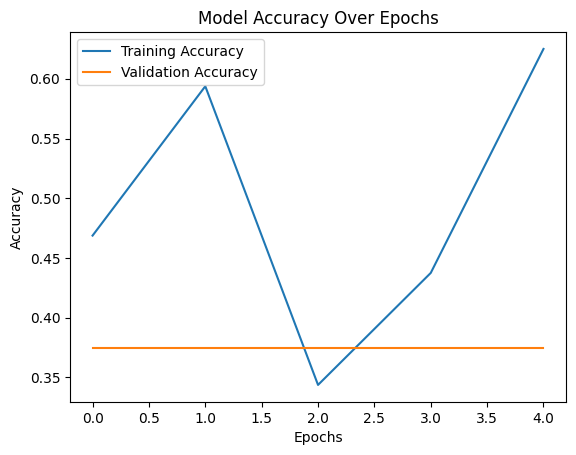

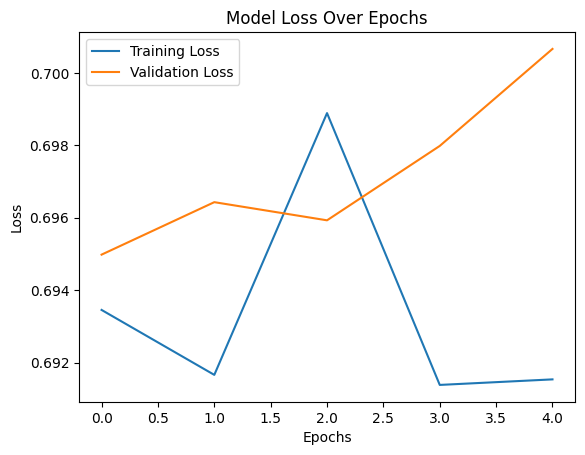

In [52]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()


In [53]:
def predict_spam(message):
    sequence = tokenizer.texts_to_sequences([message])  # Convert text to sequence
    padded_sequence = pad_sequences(sequence, maxlen=100)  # Pad sequence
    prediction = model.predict(padded_sequence)[0][0]  # Get prediction score
    return "Spam" if prediction > 0.5 else "Ham"

# Example test messages
test_messages = [
    "Congratulations! You've won a free vacation. Click the link to claim now!",
    "Hey, are we still meeting for lunch tomorrow?",
    "Your loan has been approved. Call now to claim the offer!",
    "Let's catch up this weekend. It's been a while!"
]

# Predict for each message
for msg in test_messages:
    print(f"Message: {msg} → Prediction: {predict_spam(msg)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Message: Congratulations! You've won a free vacation. Click the link to claim now! → Prediction: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Message: Hey, are we still meeting for lunch tomorrow? → Prediction: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Message: Your loan has been approved. Call now to claim the offer! → Prediction: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Message: Let's catch up this weekend. It's been a while! → Prediction: Ham


In [54]:
model.save("sms_spam_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [55]:
# ...existing code...
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("sms_spam_model.h5")
print("Model loaded successfully!")
# ...existing code...

Model loaded successfully!


In [56]:
from tensorflow.keras.layers import Bidirectional, Attention

# Improved LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),  # Increase embedding size
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM
    LSTM(32),  # Additional LSTM layer
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4375 - loss: 0.6940 - val_accuracy: 0.6250 - val_loss: 0.6926
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.4375 - loss: 0.6939 - val_accuracy: 0.3750 - val_loss: 0.6942
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.5000 - loss: 0.6942 - val_accuracy: 0.3750 - val_loss: 0.6961
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.5000 - loss: 0.6927 - val_accuracy: 0.3750 - val_loss: 0.6994
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.4688 - loss: 0.6947 - val_accuracy: 0.3750 - val_loss: 0.7011
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4688 - loss: 0.6950 - val_accuracy: 0.3750 - val_loss: 0.7012
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.5312 - loss: 0.6894 - val_accuracy: 0.3750 - val_loss: 0.7026
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5000 - loss: 0.6911 - val_accuracy: 0.3750 - val_loss: 0.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df["word"]).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["label"], test_size=0.2, random_state=42)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")


Random Forest Accuracy: 37.50%


In [ ]:
model.save("spam_sms_model.h5")
